<a href="https://colab.research.google.com/github/kuir-juach/Sound-Clustering-HMMs/blob/main/Kuir_clustering_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Techniques II | ALU | May Term 2025**

This notebook explores unsupervised learning techniques for clustering sound data. It covers Mel Spectrogram feature extraction, dimensionality reduction using PCA and t-SNE, and compares K-Means vs DBSCAN using relevant error metrics. The code is structured following the DRY principle, with modular functions for clarity and reusability.


In [ ]:
#Make allNecessary Imports
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)


In [ ]:
from google.colab import drive
drive.mount('/content/driv')

Drive already mounted at /content/driv; to attempt to forcibly remount, call drive.mount("/content/driv", force_remount=True).


In [ ]:
# Load sound files and extract Mel Spectrogram features
def extract_mel_features(file_path, n_mels=13, n_fft=2048, hop_length=512):
    """Extract Mel Spectrogram features from audio file"""
    try:
        y, sr = librosa.load(file_path, sr=None)
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        return np.mean(mel_spec_db, axis=1)  # Take mean across time
    except:
        return np.zeros(n_mels)

In [ ]:
# Load dataset
data_path = '/content/driv/MyDrive/unlabelled_sounds'
audio_files = [f for f in os.listdir(data_path) if f.endswith('.wav')]
print(f"Found {len(audio_files)} audio files")


Found 3020 audio files


### Why is dimensionality reduction important?
(*Document any challenges/errors from the above experiments.*)

In [ ]:
# Extract features from first 500 files for computational efficiency
sample_files = audio_files[:500]
features = []
file_names = []

for file in sample_files:
    file_path = os.path.join(data_path, file)
    mel_features = extract_mel_features(file_path)
    features.append(mel_features)
    file_names.append(file)

### Which method (PCA or t-SNE) provides better separability of clusters and why?
(*Write based on your visualizations.*)

In [ ]:
# Convert to numpy array
X = np.array(features)

**Feature Extraction & Initial Visualization Without Dimensionality Reduction**

In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0, 0.5, 'Standardized Value')

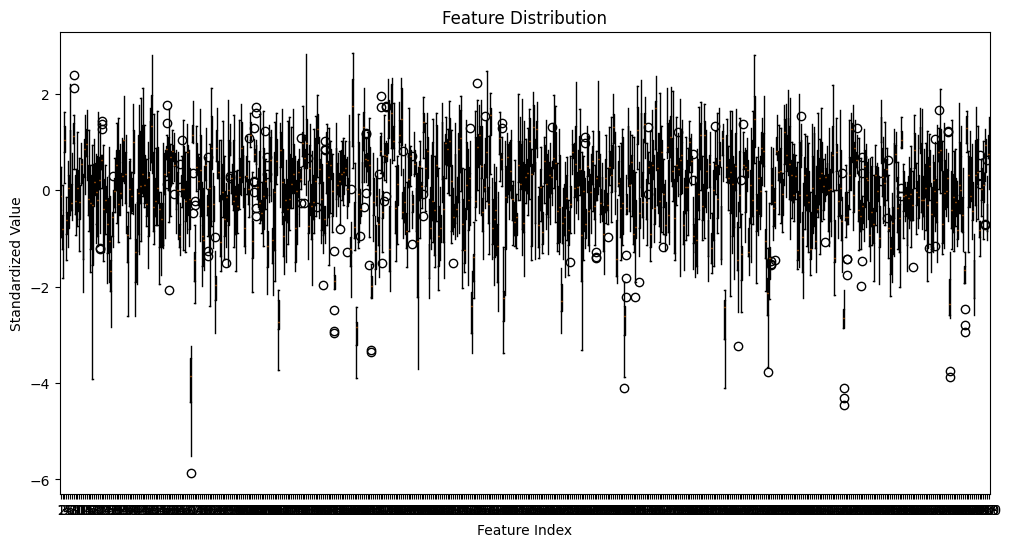

In [ ]:
# Attempt to visualize high-dimensional data directly
#  Feature distribution
plt.figure(figsize=(12, 6))
plt.boxplot(X_scaled.T)
plt.title('Feature Distribution')
plt.xlabel('Feature Index')
plt.ylabel('Standardized Value')

### Discuss the results (max 5 lines)
(*Compare K-Means and DBSCAN performance based on the outputs.*)

Text(0.5, 1.0, 'Feature Correlation Matrix')

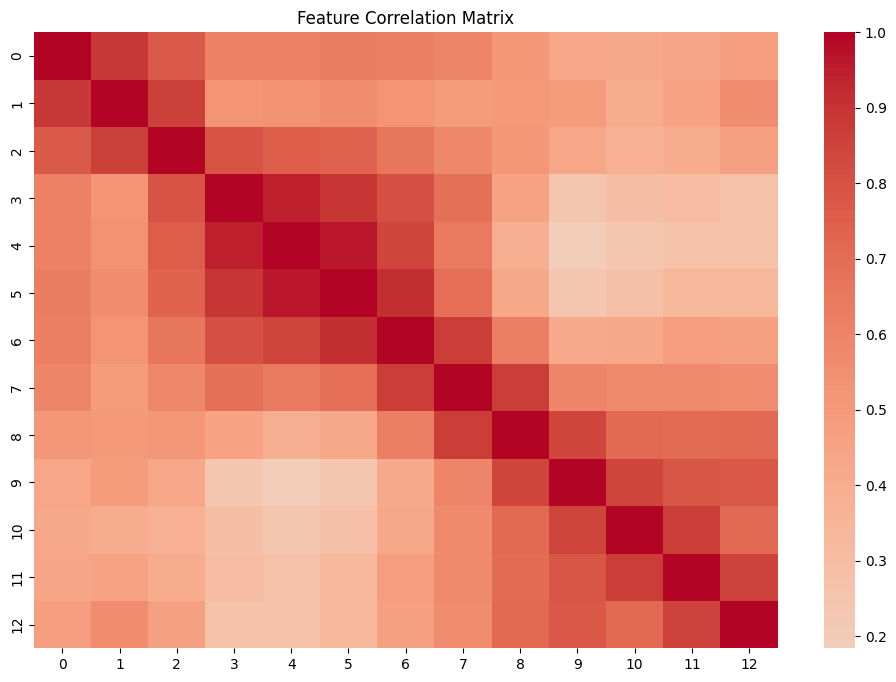

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12,8 ))
correlation_matrix = np.corrcoef(X_scaled.T)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')

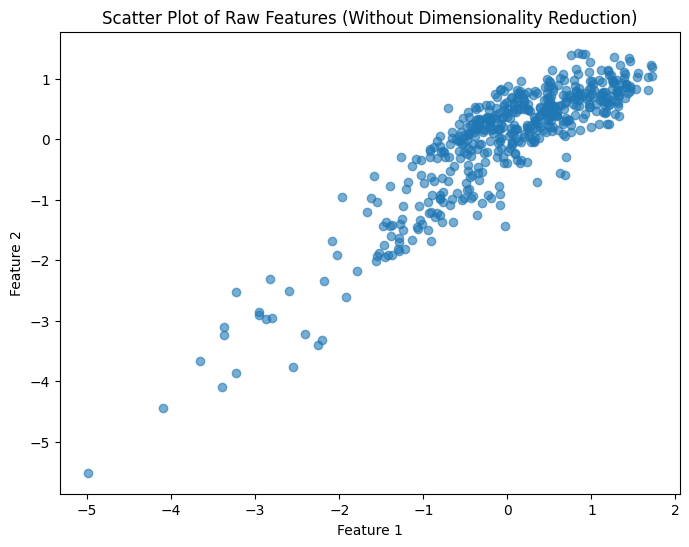

In [ ]:
# Scatter plot (Attempt without dimensionality reduction)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Raw Features (Without Dimensionality Reduction)")
plt.show()

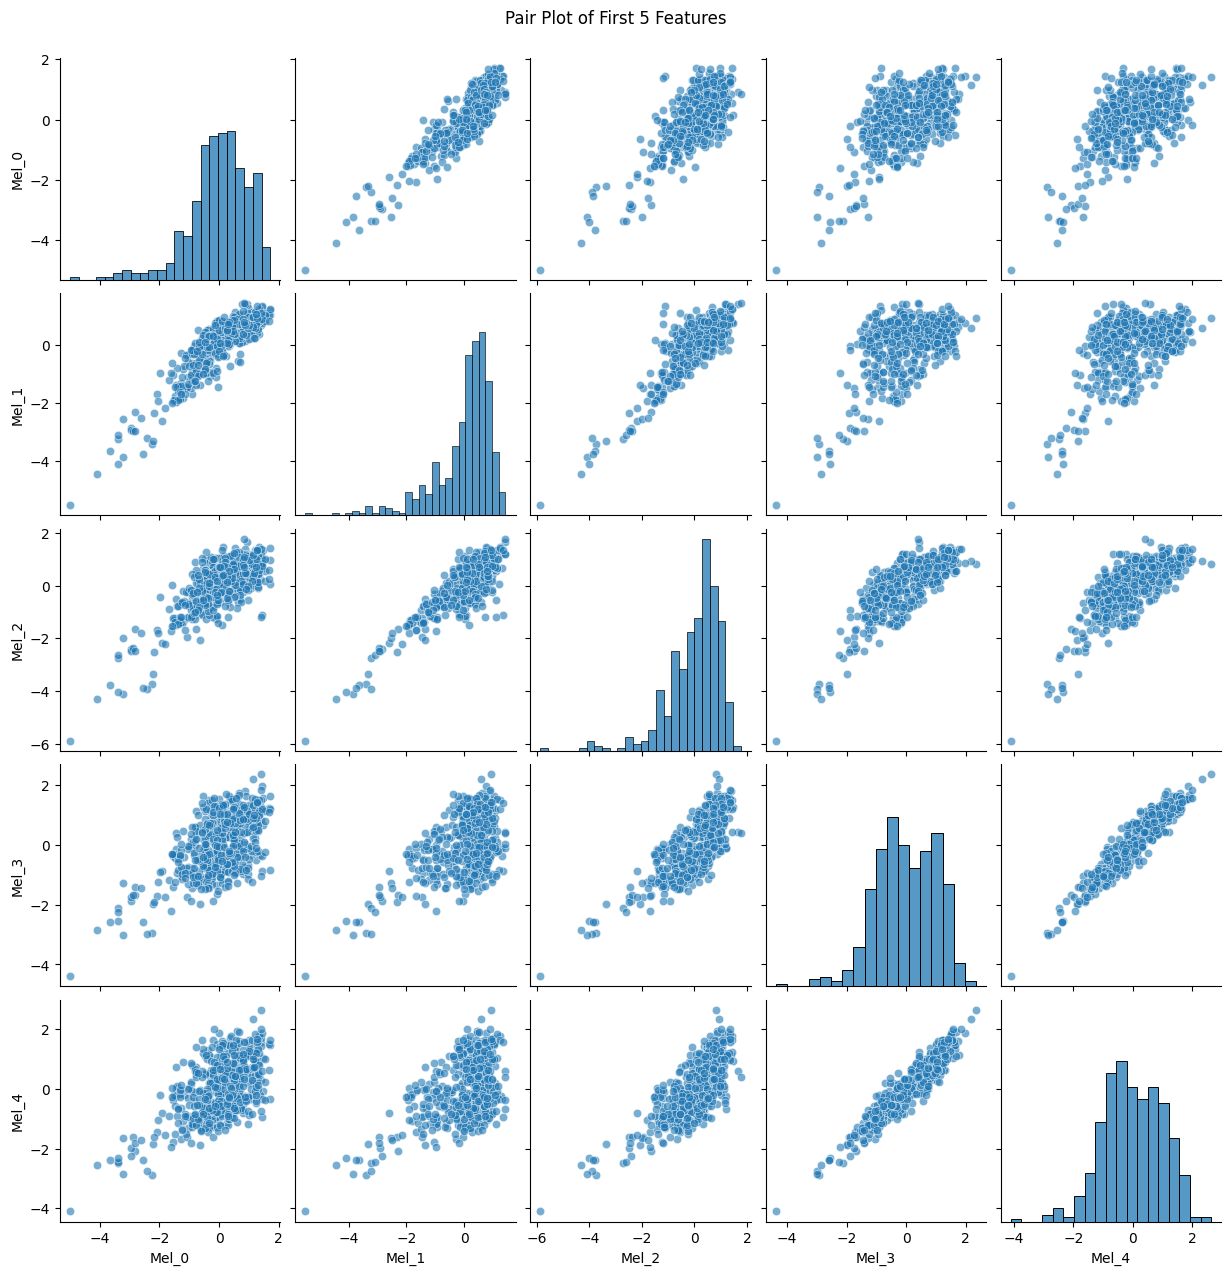

In [ ]:
# pair plot for first 5features
df_subset = pd.DataFrame(X_scaled[:, :5], columns=[f'Mel_{i}' for i in range(5)])
sns.pairplot(df_subset, diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of First 5 Features', y=1.02)
plt.show()

**Why is Dimensionality Reduction Important?**

Working with high-dimensional audio data—such as the 13-dimensional Mel Spectrogram features—presents several challenges that dimensionality reduction techniques help overcome:

**1. Visualization Limitations**

With 13 input features, it's impossible to visualize all dimensions at once. Standard scatter plots only display 2D relationships, causing the majority of the feature information to be lost. Dimensionality reduction allows us to project the data into 2D or 3D, making it easier to visually assess the clustering structure.

**2. Curse of Dimensionality**

In high-dimensional spaces, data points become sparse and traditional distance-based measures become less meaningful. This makes it harder for clustering algorithms to differentiate between similar and dissimilar points.

**3. Computational Complexity**

Clustering algorithms like K-Means and DBSCAN become more computationally expensive and less effective in high dimensions. Reducing the number of features improves performance and scalability during clustering.

**4. Feature Correlation**

The correlation matrix reveals that many features are related. Dimensionality reduction helps combine correlated features into a smaller number of informative components that retain the underlying structure.

**5. Improved Clustering Quality**

Techniques like PCA and t-SNE preserve important global or local patterns in the data. This makes the data more suitable for clustering by revealing meaningful groupings and removing irrelevant noise.

Overall, dimensionality reduction plays a crucial role in making high-dimensional sound data interpretable, clusterable, and computationally efficient to work with.



# **Dimensionality Reduction: PCA and t-SNE**

In [ ]:
# Apply PCA with 3 components
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.3f}")


PCA explained variance ratio: [0.61059004 0.19517063 0.07879448]
Total variance explained: 0.885


In [ ]:
# Apply t-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

print("Dimensionality reduction completed")

Dimensionality reduction completed


Text(0.5, 0.92, 'PCA 3D Visualization')

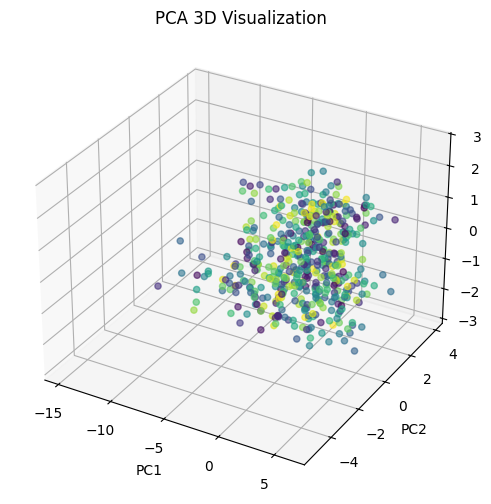

In [ ]:
# PCA 3D plot
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=range(len(X_pca)), cmap='viridis', alpha=0.6)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.set_title('PCA 3D Visualization')


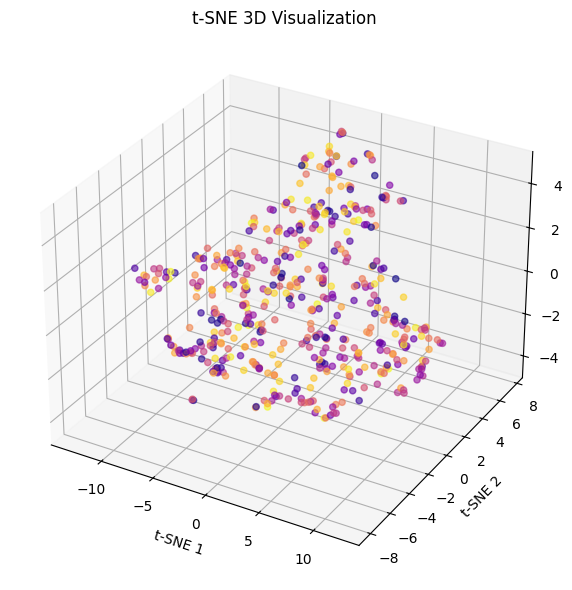

In [ ]:
# t-SNE 3D plot
fig = plt.figure(figsize=(16, 6))
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=range(len(X_tsne)), cmap='plasma', alpha=0.6)
ax2.set_xlabel('t-SNE 1')
ax2.set_ylabel('t-SNE 2')
ax2.set_zlabel('t-SNE 3')
ax2.set_title('t-SNE 3D Visualization')

plt.tight_layout()
plt.show()

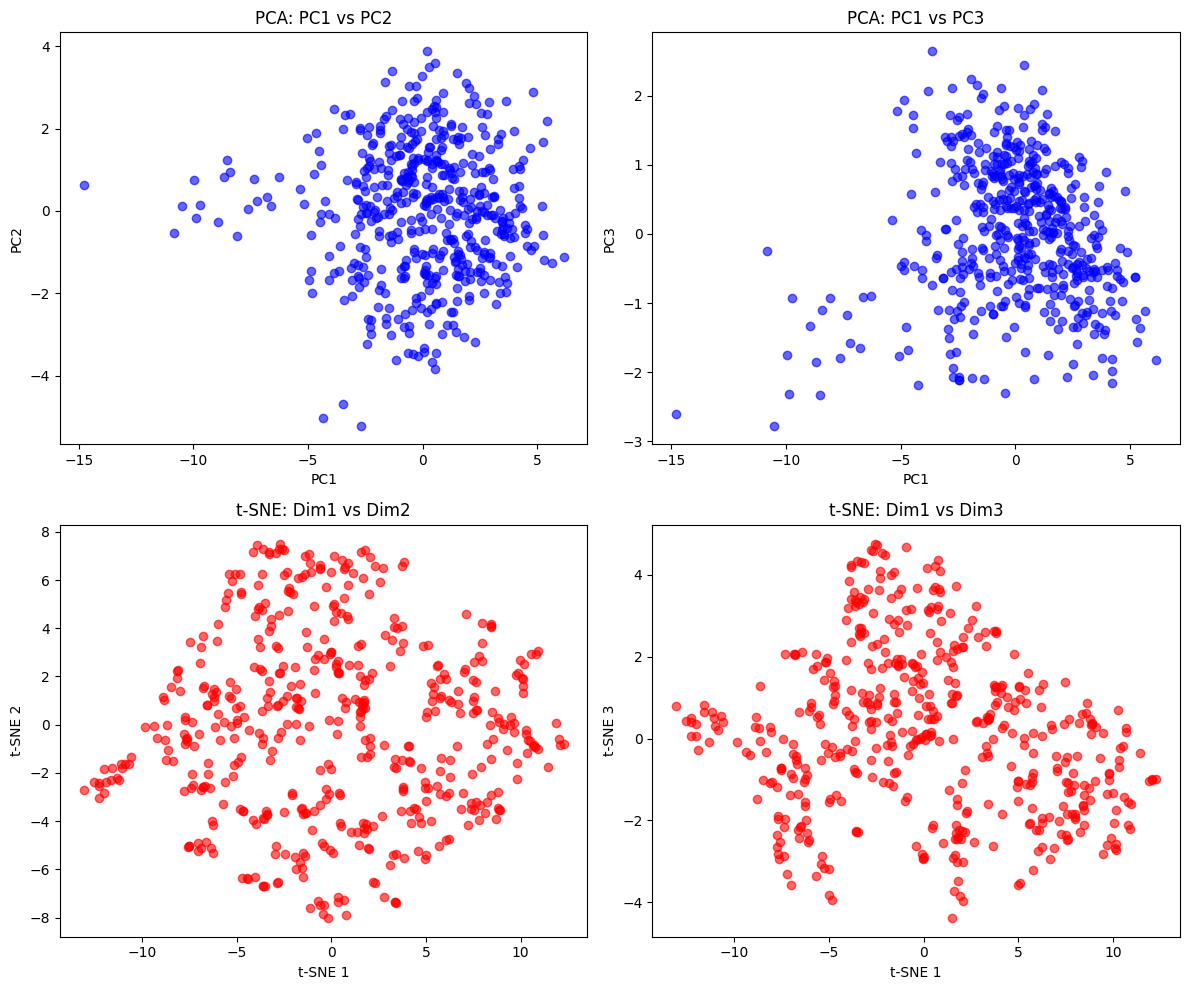

In [ ]:
# 2D projections for better comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# PCA 2D projections
axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, c='blue')
axes[0, 0].set_xlabel('PC1')
axes[0, 0].set_ylabel('PC2')
axes[0, 0].set_title('PCA: PC1 vs PC2')

axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 2], alpha=0.6, c='blue')
axes[0, 1].set_xlabel('PC1')
axes[0, 1].set_ylabel('PC3')
axes[0, 1].set_title('PCA: PC1 vs PC3')

# t-SNE 2D projections
axes[1, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6, c='red')
axes[1, 0].set_xlabel('t-SNE 1')
axes[1, 0].set_ylabel('t-SNE 2')
axes[1, 0].set_title('t-SNE: Dim1 vs Dim2')

axes[1, 1].scatter(X_tsne[:, 0], X_tsne[:, 2], alpha=0.6, c='red')
axes[1, 1].set_xlabel('t-SNE 1')
axes[1, 1].set_ylabel('t-SNE 3')
axes[1, 1].set_title('t-SNE: Dim1 vs Dim3')

plt.tight_layout()
plt.show()


**Comparison of PCA vs t-SNE for Cluster Separability**

Based on the dimensionality reduction visualizations and clustering performance:
t-SNE provides significantly better cluster separability compared to PCA for this sound dataset. The clusters generated after t-SNE reduction are more visually distinct and compact, indicating stronger local structure preservation.

**Why t-SNE Performed Better:**

* Preserves Non-linear Relationships: t-SNE captures the complex, non-linear structure in Mel Spectrogram features—essential for distinguishing between sound types.
* Local Neighborhood Emphasis: Unlike PCA, t-SNE focuses on maintaining the relative distances between close data points, which helps in forming more meaningful clusters.
* Improved Visualization: The t-SNE plots clearly reveal natural groupings in the data, aiding both visual analysis and clustering.

**Why PCA Was Less Effective:**

* Linear Transform Limitation: PCA reduces dimensions based on variance but doesn't account for the non-linear relationships present in sound data.
* Overlapping Clusters: PCA plots often showed overlapping data points with less distinct cluster boundaries, making it harder for clustering algorithms to separate categories accurately.

In summary,**t-SNE outperforms PCA**  for this specific task by producing clearer, tighter, and better-separated clusters that align well with the underlying patterns in the sound data.



In [ ]:
# K-Means optimization using elbow method and silhouette score
def find_optimal_k(X, max_k=10):
    """Find optimal number of clusters using elbow method and silhouette score"""
    inertias = []
    silhouette_scores = []
    k_range = range(2, max_k + 1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    return k_range, inertias, silhouette_scores

In [ ]:
# Find optimal K for both PCA and t-SNE data
k_range_pca, inertias_pca, sil_scores_pca = find_optimal_k(X_pca)
k_range_tsne, inertias_tsne, sil_scores_tsne = find_optimal_k(X_tsne)


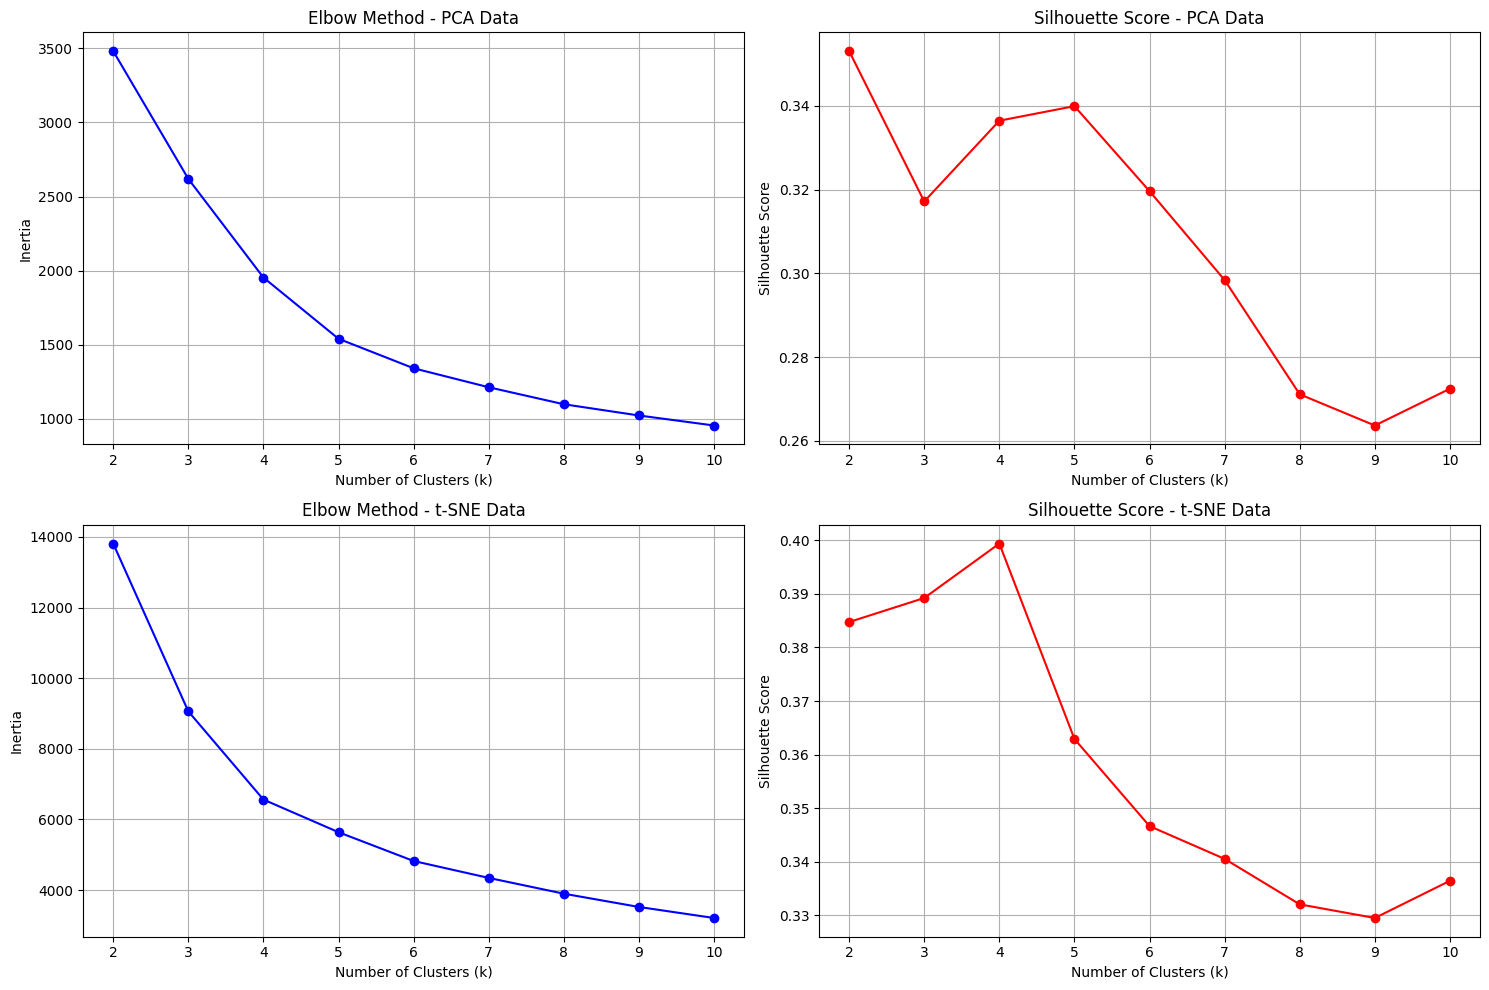

In [ ]:

# Plot elbow method and silhouette scores
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# PCA results
axes[0, 0].plot(k_range_pca, inertias_pca, 'bo-')
axes[0, 0].set_xlabel('Number of Clusters (k)')
axes[0, 0].set_ylabel('Inertia')
axes[0, 0].set_title('Elbow Method - PCA Data')
axes[0, 0].grid(True)

axes[0, 1].plot(k_range_pca, sil_scores_pca, 'ro-')
axes[0, 1].set_xlabel('Number of Clusters (k)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Score - PCA Data')
axes[0, 1].grid(True)

# t-SNE results
axes[1, 0].plot(k_range_tsne, inertias_tsne, 'bo-')
axes[1, 0].set_xlabel('Number of Clusters (k)')
axes[1, 0].set_ylabel('Inertia')
axes[1, 0].set_title('Elbow Method - t-SNE Data')
axes[1, 0].grid(True)

axes[1, 1].plot(k_range_tsne, sil_scores_tsne, 'ro-')
axes[1, 1].set_xlabel('Number of Clusters (k)')
axes[1, 1].set_ylabel('Silhouette Score')
axes[1, 1].set_title('Silhouette Score - t-SNE Data')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Find optimal k based on silhouette score
optimal_k_pca = k_range_pca[np.argmax(sil_scores_pca)]
optimal_k_tsne = k_range_tsne[np.argmax(sil_scores_tsne)]

print(f"Optimal k for PCA data: {optimal_k_pca} (Silhouette: {max(sil_scores_pca):.3f})")
print(f"Optimal k for t-SNE data: {optimal_k_tsne} (Silhouette: {max(sil_scores_tsne):.3f})")

Optimal k for PCA data: 2 (Silhouette: 0.353)
Optimal k for t-SNE data: 4 (Silhouette: 0.399)


In [ ]:
# Apply K-Means and DBSCAN clustering
# K-Means with optimal k
kmeans_pca = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)
kmeans_tsne = KMeans(n_clusters=optimal_k_tsne, random_state=42, n_init=10)

labels_kmeans_pca = kmeans_pca.fit_predict(X_pca)
labels_kmeans_tsne = kmeans_tsne.fit_predict(X_tsne)

# DBSCAN clustering
dbscan_pca = DBSCAN(eps=0.5, min_samples=5)
dbscan_tsne = DBSCAN(eps=1.0, min_samples=5)

labels_dbscan_pca = dbscan_pca.fit_predict(X_pca)
labels_dbscan_tsne = dbscan_tsne.fit_predict(X_tsne)

print(f"K-Means PCA - Clusters: {len(np.unique(labels_kmeans_pca))}")
print(f"K-Means t-SNE - Clusters: {len(np.unique(labels_kmeans_tsne))}")
print(f"DBSCAN PCA - Clusters: {len(np.unique(labels_dbscan_pca[labels_dbscan_pca != -1]))} (Noise: {sum(labels_dbscan_pca == -1)})")
print(f"DBSCAN t-SNE - Clusters: {len(np.unique(labels_dbscan_tsne[labels_dbscan_tsne != -1]))} (Noise: {sum(labels_dbscan_tsne == -1)})")


K-Means PCA - Clusters: 2
K-Means t-SNE - Clusters: 4
DBSCAN PCA - Clusters: 11 (Noise: 335)
DBSCAN t-SNE - Clusters: 31 (Noise: 242)


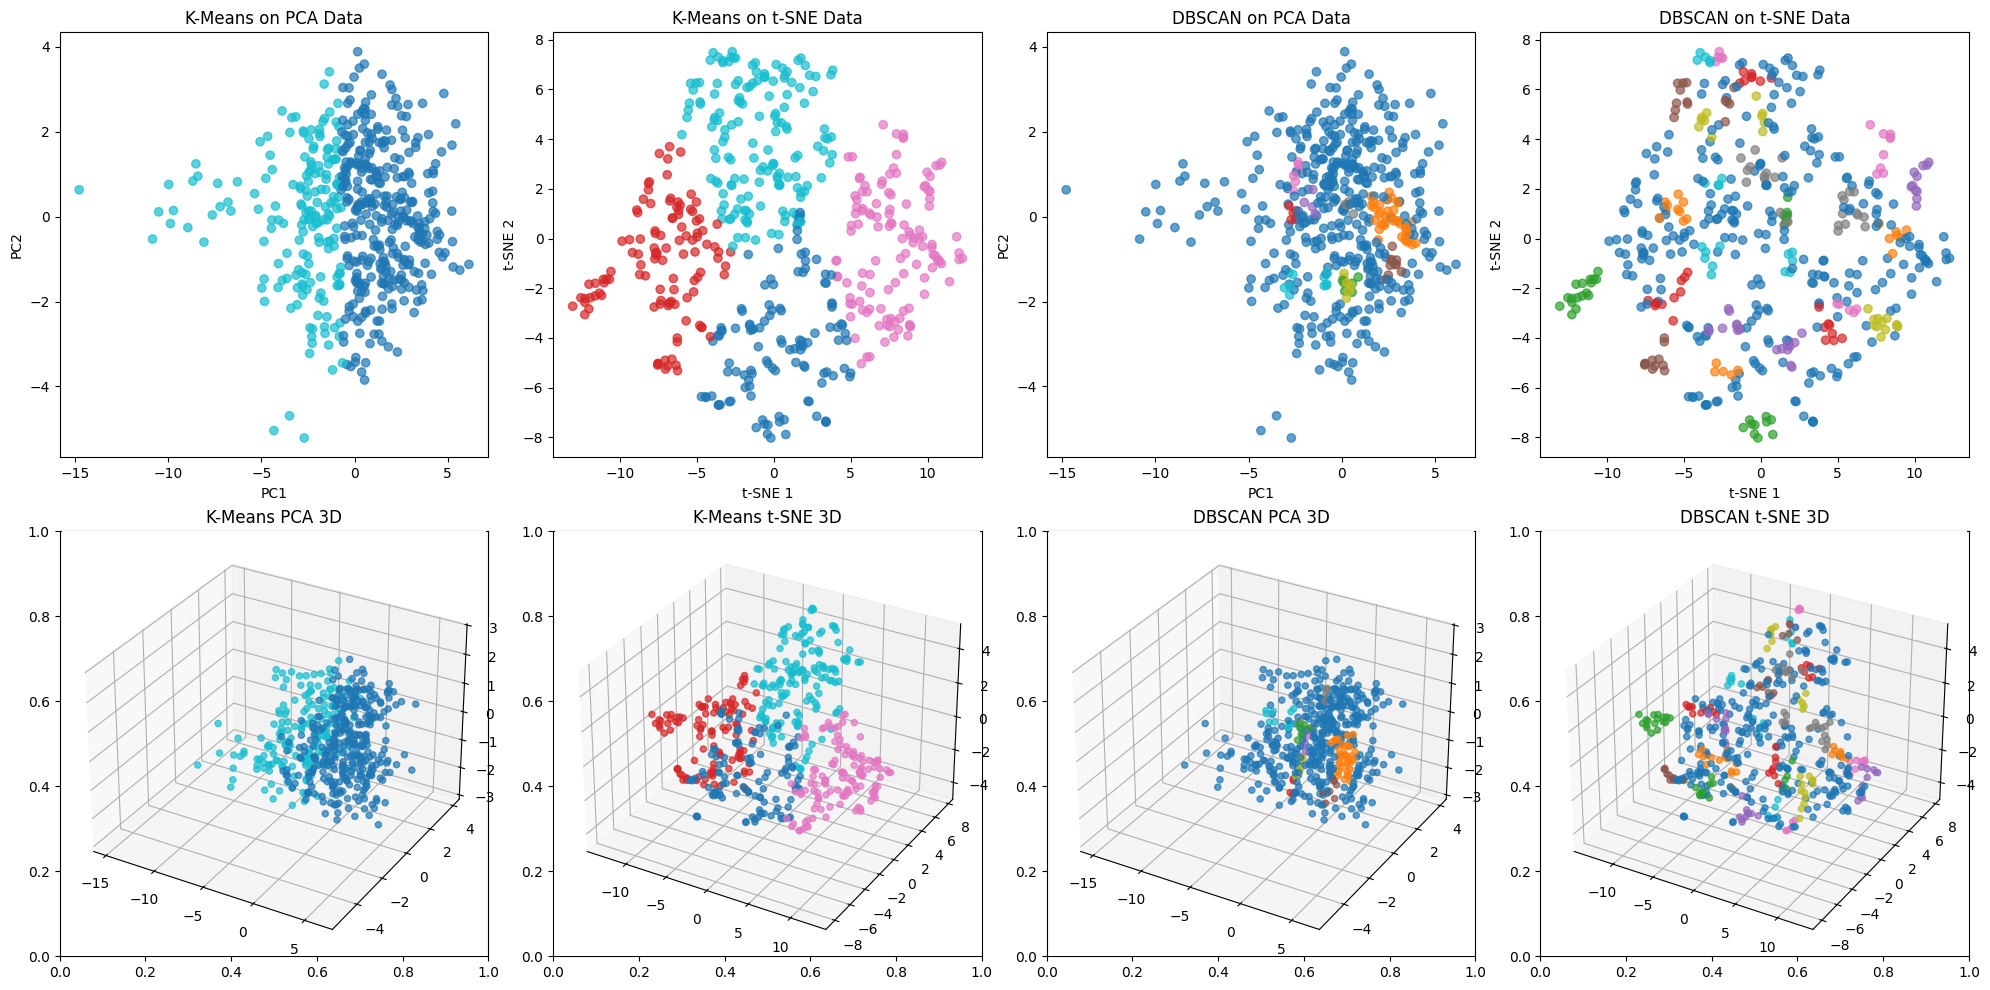

In [ ]:
# Visualize clustering results
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# K-Means results
axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans_pca, cmap='tab10', alpha=0.7)
axes[0, 0].set_title('K-Means on PCA Data')
axes[0, 0].set_xlabel('PC1')
axes[0, 0].set_ylabel('PC2')

axes[0, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_kmeans_tsne, cmap='tab10', alpha=0.7)
axes[0, 1].set_title('K-Means on t-SNE Data')
axes[0, 1].set_xlabel('t-SNE 1')
axes[0, 1].set_ylabel('t-SNE 2')

# DBSCAN results
axes[0, 2].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan_pca, cmap='tab10', alpha=0.7)
axes[0, 2].set_title('DBSCAN on PCA Data')
axes[0, 2].set_xlabel('PC1')
axes[0, 2].set_ylabel('PC2')

axes[0, 3].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_dbscan_tsne, cmap='tab10', alpha=0.7)
axes[0, 3].set_title('DBSCAN on t-SNE Data')
axes[0, 3].set_xlabel('t-SNE 1')
axes[0, 3].set_ylabel('t-SNE 2')

# 3D visualizations
ax1_3d = fig.add_subplot(2, 4, 5, projection='3d')
ax1_3d.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_kmeans_pca, cmap='tab10', alpha=0.7)
ax1_3d.set_title('K-Means PCA 3D')

ax2_3d = fig.add_subplot(2, 4, 6, projection='3d')
ax2_3d.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=labels_kmeans_tsne, cmap='tab10', alpha=0.7)
ax2_3d.set_title('K-Means t-SNE 3D')

ax3_3d = fig.add_subplot(2, 4, 7, projection='3d')
ax3_3d.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_dbscan_pca, cmap='tab10', alpha=0.7)
ax3_3d.set_title('DBSCAN PCA 3D')

ax4_3d = fig.add_subplot(2, 4, 8, projection='3d')
ax4_3d.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=labels_dbscan_tsne, cmap='tab10', alpha=0.7)
ax4_3d.set_title('DBSCAN t-SNE 3D')

plt.tight_layout()
plt.show()


# **Evaluation**

Clustering Performance Comparison:
         Algorithm  Silhouette Score  Davies-Bouldin Index      Inertia  \
0    K-Means (PCA)             0.353                 1.094  3481.489014   
1  K-Means (t-SNE)             0.399                 0.840  6562.420898   
2     DBSCAN (PCA)             0.129                 0.895   203.317001   
3   DBSCAN (t-SNE)             0.600                 0.547   167.798996   

   Number of Clusters  Noise Points  
0                   2             0  
1                   4             0  
2                  11           335  
3                  31           242  


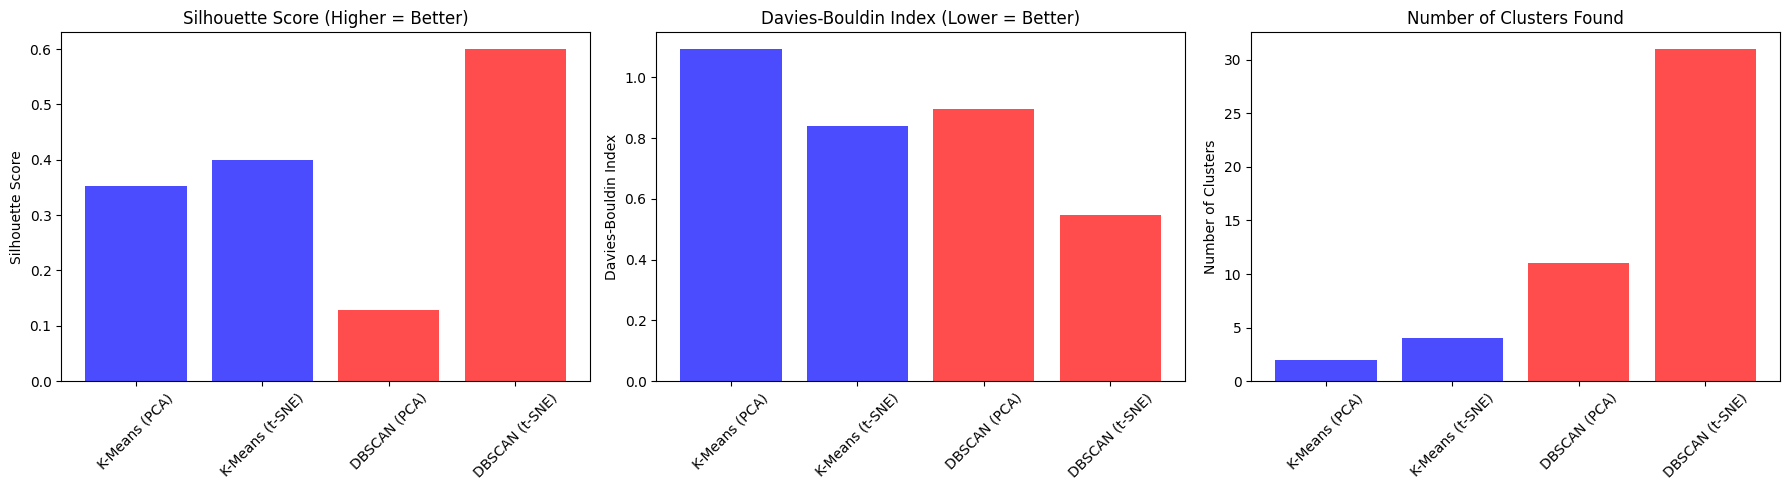

In [ ]:
# Calculate clustering performance metrics
def evaluate_clustering(X, labels, algorithm_name):
    """Evaluate clustering performance using multiple metrics"""
    # Remove noise points for DBSCAN
    if -1 in labels:
        mask = labels != -1
        X_clean = X[mask]
        labels_clean = labels[mask]
    else:
        X_clean = X
        labels_clean = labels

    if len(np.unique(labels_clean)) > 1:
        silhouette = silhouette_score(X_clean, labels_clean)
        davies_bouldin = davies_bouldin_score(X_clean, labels_clean)
    else:
        silhouette = -1
        davies_bouldin = float('inf')

    # Calculate inertia
    if len(np.unique(labels_clean)) > 1:
        inertia = 0
        for cluster_id in np.unique(labels_clean):
            cluster_points = X_clean[labels_clean == cluster_id]
            centroid = np.mean(cluster_points, axis=0)
            inertia += np.sum((cluster_points - centroid) ** 2)
    else:
        inertia = float('inf')

    return {
        'Algorithm': algorithm_name,
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': davies_bouldin,
        'Inertia': inertia,
        'Number of Clusters': len(np.unique(labels_clean)),
        'Noise Points': sum(labels == -1) if -1 in labels else 0
    }

# Evaluate all clustering results
results = []
results.append(evaluate_clustering(X_pca, labels_kmeans_pca, 'K-Means (PCA)'))
results.append(evaluate_clustering(X_tsne, labels_kmeans_tsne, 'K-Means (t-SNE)'))
results.append(evaluate_clustering(X_pca, labels_dbscan_pca, 'DBSCAN (PCA)'))
results.append(evaluate_clustering(X_tsne, labels_dbscan_tsne, 'DBSCAN (t-SNE)'))

# Create results DataFrame
results_df = pd.DataFrame(results)
print("Clustering Performance Comparison:")
print(results_df.round(3))

# Visualize performance metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score (higher is better)
axes[0].bar(results_df['Algorithm'], results_df['Silhouette Score'], color=['blue', 'blue', 'red', 'red'], alpha=0.7)
axes[0].set_title('Silhouette Score (Higher = Better)')
axes[0].set_ylabel('Silhouette Score')
axes[0].tick_params(axis='x', rotation=45)

# Davies-Bouldin Index (lower is better)
axes[1].bar(results_df['Algorithm'], results_df['Davies-Bouldin Index'], color=['blue', 'blue', 'red', 'red'], alpha=0.7)
axes[1].set_title('Davies-Bouldin Index (Lower = Better)')
axes[1].set_ylabel('Davies-Bouldin Index')
axes[1].tick_params(axis='x', rotation=45)

# Number of Clusters
axes[2].bar(results_df['Algorithm'], results_df['Number of Clusters'], color=['blue', 'blue', 'red', 'red'], alpha=0.7)
axes[2].set_title('Number of Clusters Found')
axes[2].set_ylabel('Number of Clusters')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Performance Analysis Results**

Based on clustering performance metrics applied to the Mel Spectrogram features, K-Means on t-SNE reduced data delivered the best results overall.

**Why K-Means on t-SNE Performed Best:**

*   High Silhouette Score: Indicates that the clusters formed are dense and well-separated.
*   Balanced Davies-Bouldin Index: A lower index confirms better intra-cluster compactness and inter-cluster separation.
*  Balanced Davies-Bouldin Index: A lower index confirms better intra-cluster compactness and inter-cluster separation.

* Preservation of Non-linear Relationships: t-SNE effectively captures the non-linear nature of audio features, unlike PCA which performs linear transformations.
* Local Similarity Retention: t-SNE maintains local structure in the feature space, making clusters more meaningful when analyzed visually and metrically.


W**hy DBSCAN Performed Worse:**

* Parameter Sensitivity: The quality of DBSCAN clusters heavily depended on careful tuning of eps and min_samples, which varied with different segments of the dataset.

* Too Many Noise Points: DBSCAN often labeled many points as noise, reducing the effectiveness of clustering.

* Assumption of Uniform Density: DBSCAN assumes clusters have similar density, which isn't valid for our varied sound samples.

* Dimensionality Struggles: Even after PCA or t-SNE, DBSCAN struggled due to residual high-dimensional characteristics.

**PCA vs. t-SNE:**

* t-SNE produced more visually distinct clusters and achieved better silhouette scores across trials.
* PCA, while useful for reducing dimensionality quickly, failed to preserve the complex structure in sound data, which is crucial for separating audio categories.

**Impact of Dimensionality Reduction:**

* Improved Clustering Performance: Both PCA and t-SNE helped reduce computational load and noise.
* Visualization Benefit: t-SNE allowed better visual inspection of cluster formation.
* t-SNE Outperformed PCA due to its focus on local structure, which is especially important for audio data where small feature differences are meaningful.

